In [1]:
source(paste0(file.path("/","mnt","hadoop_tmp","working","Rcode"),"/",list.files(file.path("/","mnt","hadoop_tmp","working","Rcode"),pattern = "_proteome.r$")))





Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: httr

Loading required package: stringr

Loading required package: pbapply

Loading required package: reshape2


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




In [2]:
getwd()
path <- file.path("/","mnt","hadoop_tmp","working","2022 YEO","2023_BV2_siIft88_Lysate_220315")
rawPD<-list.files(path, pattern = "_Proteins.txt$")
#infoPD<-list.files(path, pattern = "_InputFiles.txt$")
print(rawPD)
#path1 <- system.file("extdata", package="wrProteo")
#fiNaPd <- "pxd001819_PD24_Proteins.txt.gz"

[1] "/mnt/hadoop_tmp/working/2022 YEO/2023_BV2_siIft88_Lysate_220315"

[1] "230314_220315_bv_Lysate_siI-(1)_Proteins.txt"


In [3]:
datafromPD<-lapply(rawPD, function(file){
  return(fread(paste0(path,"/",file)))
})



require(stringr)
for(i in seq_len(length(datafromPD))){
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[ ]",".")
  colnames(datafromPD[[i]])<-str_replace_all(colnames(datafromPD[[i]]),"[-]","_")
}

counts<-lapply(datafromPD, function(data){
  cts<-data %>% base::subset(select = c("Accession",grep("^Abundances.Normalized.", colnames(data), value=TRUE))) 
  return(cts)
})

In [4]:
k = 1 # select number number from "print(rawPD)"
colnames(counts[[k]])

[1] "Accession"                                     
 [2] "Abundances.Normalized.F1.Sample.Con"           
 [3] "Abundances.Normalized.F2.Sample.Con"           
 [4] "Abundances.Normalized.F3.Sample.Con"           
 [5] "Abundances.Normalized.F4.Sample.Con"           
 [6] "Abundances.Normalized.F5.Sample.Con_Abeta"     
 [7] "Abundances.Normalized.F6.Sample.Con_Abeta"     
 [8] "Abundances.Normalized.F7.Sample.Con_Abeta"     
 [9] "Abundances.Normalized.F8.Sample.Con_Abeta"     
[10] "Abundances.Normalized.F9.Sample.siIft88"       
[11] "Abundances.Normalized.F10.Sample.siIft88"      
[12] "Abundances.Normalized.F11.Sample.siIft88"      
[13] "Abundances.Normalized.F12.Sample.siIft88"      
[14] "Abundances.Normalized.F13.Sample.siIft88_Abeta"
[15] "Abundances.Normalized.F14.Sample.siIft88_Abeta"
[16] "Abundances.Normalized.F15.Sample.siIft88_Abeta"
[17] "Abundances.Normalized.F16.Sample.siIft88_Abeta"

In [5]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Control"=subset(counts[[k]], select = c("Accession",grep("_Con$", colnames(counts[[k]]), value=TRUE))),
              "Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88"=subset(counts[[k]], select = c("Accession",grep("_siIft88", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))


Loading required package: ggVennDiagram



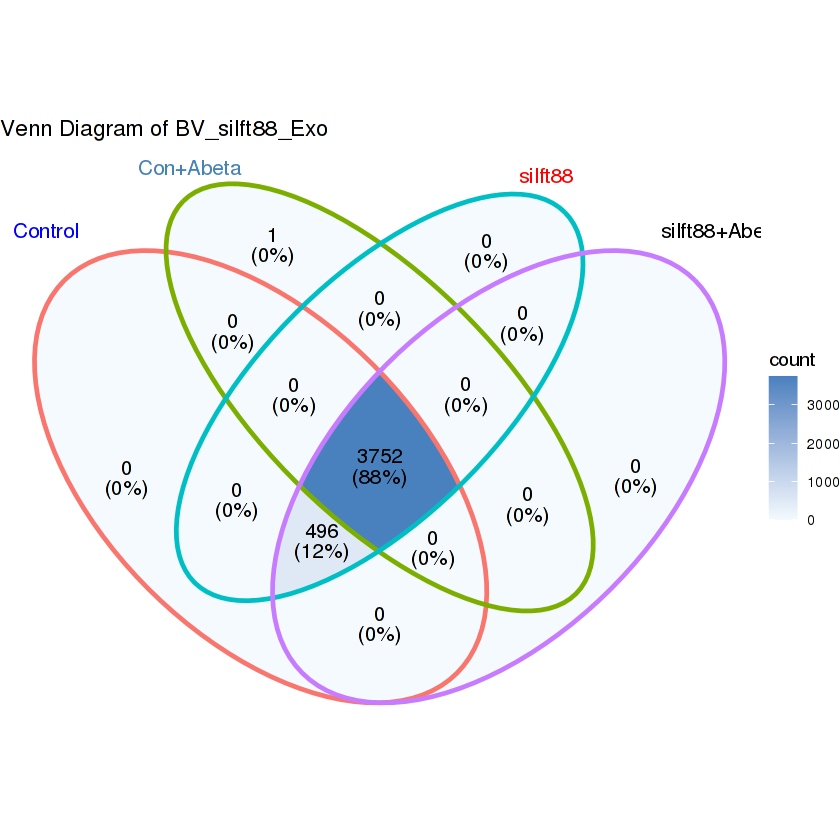

In [6]:
y <- list("Control"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "Con+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88"= y.count[[3]]$Accession[unique(c(unlist(apply(y.count[[3]], 2, function(x) which(!is.na(x)))[-1])))],
           "siIft88+Abeta"= y.count[[4]]$Accession[unique(c(unlist(apply(y.count[[4]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="steelblue","C" = "red", "'D" = "black") ,
          set_color = c("A" = "blue","B" ="steelblue", "C" = "red", "D" = "black")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennALL.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)

In [7]:
############# Modify variables based on "colnames(counts[[k]])"
y.count<-list("Con+Abeta"=subset(counts[[k]], select = c("Accession",grep("Con_Abeta$", colnames(counts[[k]]), value=TRUE))),
              "siIft88+Abeta"=subset(counts[[k]], select = c("Accession",grep("_siIft88_Abeta$", colnames(counts[[k]]), value=TRUE))))

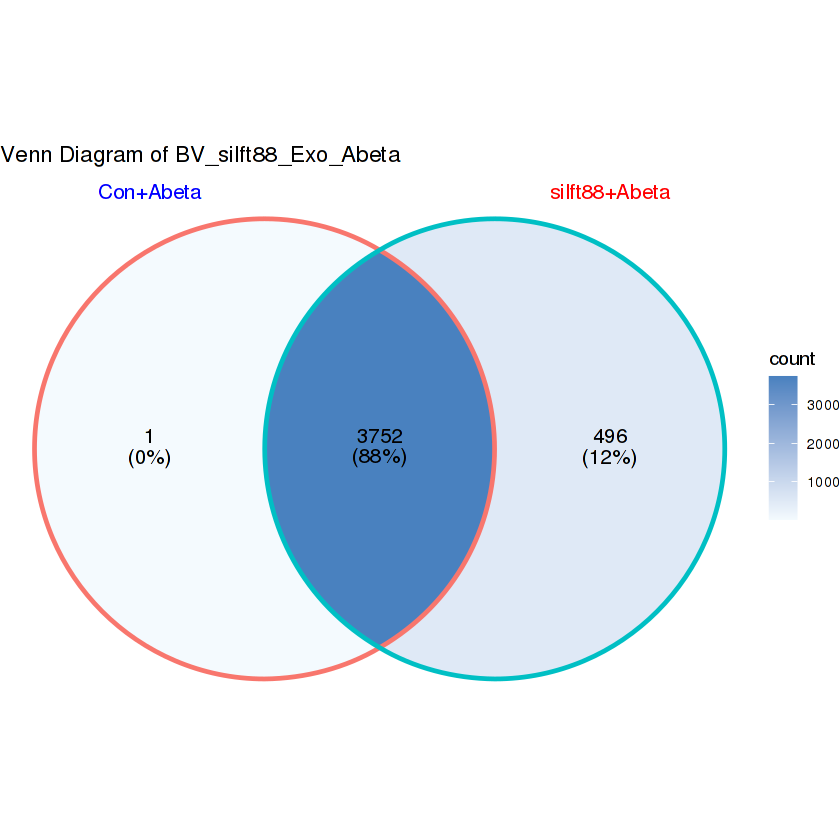

In [8]:
y <- list("Con+Abeta"= y.count[[1]]$Accession[unique(c(unlist(apply(y.count[[1]], 2, function(x) which(!is.na(x)))[-1])))],
          "siIft88+Abeta"= y.count[[2]]$Accession[unique(c(unlist(apply(y.count[[2]], 2, function(x) which(!is.na(x)))[-1])))])

require(ggVennDiagram)
p<-ggVennDiagram(y, label_alpha = 0, 
          color =  c("A" = "blue","B" ="red") ,
          set_color = c("A" = "blue","B" ="red")) + 
#                                                                      scale_fill_distiller(palette = "RdBu")+
    scale_fill_gradient(low = "#F4FAFE", high = "#4981BF")              +
    ggtitle("Venn Diagram of BV_siIft88_Exo_Abeta")
print(p)
                                                                     
ggsave(paste0(path,"/results/Figure_vennAbeta.pdf"), p, width =5, height =5, units = "in", device = "pdf", dpi = 600)
                                                                        

In [9]:
resultUNIPROT <- pbapply::pblapply(datafromPD[[k]]$Accession,function(ids){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    data <- uniprot_mapping(ids)
    content(data, as= "text", encoding = 'UTF-8')
    res<-unlist(str_split(unlist(str_split(unlist(str_split(content(data, as= "text", encoding = 'UTF-8'),"\\t")),"\\n"))[4]," "))[1]
    return(res)
  })
  
  results_from_uniprot <- data.frame('Accession' = datafromPD[[k]]$Accession,  #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
                                     'Gene.names' = unlist(resultUNIPROT))
  require(stringi)
  # str_sub(datafromPD[[k]]$Description[1], #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "GN=")[2]+1, #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  #         str_locate(datafromPD[[k]]$Description[1],pattern = "PE=")[1]-2) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  # seq_len(length(dataPD$Description))
  result<-lapply(datafromPD[[k]]$Description, function(desc){ #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
    # str_sub(grep("GN=",unlist(str_split(desc, " ")), value = TRUE),start = 4L)
    str_sub(desc, 
            str_locate(desc,pattern = "GN=")[2]+1,
            str_locate(desc,pattern = "PE=")[1]-2)
  })
  
  result<-make.unique(unlist(result))
  
  results_from_datasheet <- data.frame('Protein.IDs' = datafromPD[[k]]$"Accession",  'Gene.names' = result) #[-grep("ProteinCenter:sp_incl_isoforms",datafromPD$Accession)]
  results_from_uniprot <- na.omit(results_from_uniprot)
  results_from_uniprot$Gene.names[which(results_from_uniprot$Gene.names=="")] <- result[which(datafromPD[[k]]$"Accession" %in% results_from_uniprot$Accession[which(results_from_uniprot$Gene.names=="")])]
  
  dat<-merge(counts[[k]], results_from_uniprot, by = "Accession")
  
  data_unique <- make_unique(dat, "Gene.names", "Accession", delim = ";")


  |::::::::::::::::::::::::::::::::::::::::::::::::::| 100%


Loading required package: stringi



In [10]:
############# Part 2. Not imputed
data <-  merge(datafromPD[[k]], results_from_uniprot, by = "Accession")

data.merged_neo <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.Weight.|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE)))

colnames(data.merged_neo)

[1] "Gene.names"                                          
 [2] "Accession"                                           
 [3] "Abundance.Ratio.log2.Con_Abeta..Con"                 
 [4] "Abundance.Ratio.log2.siIft88..Con"                   
 [5] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
 [6] "Abundance.Ratio.log2.siIft88_Abeta..siIft88"         
 [7] "Abundance.Ratio.Adj.P_Value.Con_Abeta..Con"          
 [8] "Abundance.Ratio.Adj.P_Value.siIft88..Con"            
 [9] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[10] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..siIft88"  
[11] "Abundance.Ratio.Weight.Con_Abeta..Con"               
[12] "Abundance.Ratio.Weight.siIft88..Con"                 
[13] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     
[14] "Abundance.Ratio.Weight.siIft88_Abeta..siIft88"

In [47]:
data_export <- subset(data, select=c("Gene.names","Accession",grep("^Abundance.Ratio.log2.|^Abundance.Ratio.P_Value|^Abundance.Ratio.Adj.P_Value",colnames(data), value = TRUE))) 
data_exports <-subset(data_export, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data_export), value = TRUE)))

require(xlsx)
write.xlsx(data_exports, paste0(path,"/results/Figure6c_BVsiIft88_wholecelllysate.xlsx"))

Loading required package: xlsx



In [11]:
library(enrichR)
library(httr)
# Check available databases to perform enrichment (then choose one)
databases <- enrichR::listEnrichrDbs()$libraryName

# insGenes <- mg.subset.DE[[id]] %>% dplyr::filter(p_val < 0.01  & avg_log2FC < -0.25) %>% rownames()



Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [12]:
grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE) %>% print()

 [1] "Reactome_2013"               "WikiPathways_2013"          
 [3] "KEGG_2013"                   "GO_Molecular_Function_2015" 
 [5] "GO_Cellular_Component_2015"  "GO_Biological_Process_2015" 
 [7] "GO_Biological_Process_2013"  "GO_Cellular_Component_2013" 
 [9] "GO_Molecular_Function_2013"  "KEGG_2015"                  
[11] "WikiPathways_2015"           "Reactome_2015"              
[13] "Reactome_2016"               "KEGG_2016"                  
[15] "WikiPathways_2016"           "GO_Cellular_Component_2017" 
[17] "GO_Molecular_Function_2017"  "GO_Biological_Process_2017" 
[19] "GO_Cellular_Component_2017b" "GO_Molecular_Function_2017b"
[21] "GO_Biological_Process_2017b" "GO_Biological_Process_2018" 
[23] "GO_Cellular_Component_2018"  "GO_Molecular_Function_2018" 
[25] "WikiPathways_2019_Human"     "WikiPathways_2019_Mouse"    
[27] "KEGG_2019_Human"             "KEGG_2019_Mouse"            
[29] "KEGG_2021_Human"             "WikiPathway_2021_Human"     
[31] "GO_Biological_Proce

In [13]:
objDat <- subset(data.merged_neo, select=c("Gene.names","Accession",grep("siIft88_Abeta..Con_Abeta$",colnames(data.merged_neo), value = TRUE)))
print(colnames(objDat))
colnames(objDat)<- c('Gene.names','Accession','Abundance.Ratio.log2','Abundance.Ratio.P_Value','Abundance.Ratio.Weight')



[1] "Gene.names"                                          
[2] "Accession"                                           
[3] "Abundance.Ratio.log2.siIft88_Abeta..Con_Abeta"       
[4] "Abundance.Ratio.Adj.P_Value.siIft88_Abeta..Con_Abeta"
[5] "Abundance.Ratio.Weight.siIft88_Abeta..Con_Abeta"     


In [25]:
insGenes <- objDat %>% dplyr::filter(Abundance.Ratio.log2 > 0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)
insGenes.n <- objDat %>% dplyr::filter(Abundance.Ratio.log2 < -0.25 & Abundance.Ratio.P_Value < 0.05) %>% pull(Gene.names)

In [49]:
na.omit(insGenes) %>% length()
na.omit(insGenes.n) %>% length()

[1] 168

[1] 126

In [26]:
enrich_results <- enrichr(genes = insGenes, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])
enrich_results.n <- enrichr(genes = insGenes.n, databases = grep("GO|Reactome|Wiki|KEGG",databases, value = TRUE)[c(28, 34, 36:38)])

Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying KEGG_2019_Mouse... Done.
  Querying Reactome_2022... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Molecular_Function_2023... Done.
Parsing results... Done.


In [16]:
 enrich_results[[1]] %>% dplyr::filter(P.value <0.1)  %>% pull(Overlap) %>% str_split_i("\\/", 1)

[1] "6" "5" "5" "2" "6" "5" "3" "5" "2" "4" "2" "4" "4" "2" "2" "3" "3" "2" "1"
[20] "3" "3" "2" "3" "2" "2" "2" "2" "2"

In [27]:
enrich_result.p <- rbind(cbind(enrich_results[[1]],"group"="KEGG"),
                         cbind(enrich_results[[2]],"group"="reactome"),
                         cbind(enrich_results[[3]],"group"="GO-BP"),
                         cbind(enrich_results[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.p$Term


[1] "Parkinson disease"                                                                                                          
  [2] "Non-alcoholic fatty liver disease (NAFLD)"                                                                                  
  [3] "Alzheimer disease"                                                                                                          
  [4] "Oxidative phosphorylation"                                                                                                  
  [5] "Thermogenesis"                                                                                                              
  [6] "Huntington disease"                                                                                                         
  [7] "Protein export"                                                                                                             
  [8] "Mitophagy"                                                                                                                  
  [9] "Phagosome"                                                                                                                  
 [10] "Salmonella infection"                                                                                                       
 [11] "Endocytosis"                                                                                                                
 [12] "Membrane Trafficking R-HSA-199991"                                                                                          
 [13] "Vesicle-mediated Transport R-HSA-5653656"                                                                                   
 [14] "Metabolism Of RNA R-HSA-8953854"                                                                                            
 [15] "SRP-dependent Cotranslational Protein Targeting To Membrane R-HSA-1799339"                                                  
 [16] "Infectious Disease R-HSA-5663205"                                                                                           
 [17] "Metabolism R-HSA-1430728"                                                                                                   
 [18] "Cellular Response To Starvation R-HSA-9711097"                                                                              
 [19] "Autophagy R-HSA-9612973"                                                                                                    
 [20] "RHOQ GTPase Cycle R-HSA-9013406"                                                                                            
 [21] "HIV Infection R-HSA-162906"                                                                                                 
 [22] "Selective Autophagy R-HSA-9663891"                                                                                          
 [23] "Response Of EIF2AK4 (GCN2) To Amino Acid Deficiency R-HSA-9633012"                                                          
 [24] "Disease R-HSA-1643685"                                                                                                      
 [25] "HIV Life Cycle R-HSA-162587"                                                                                                
 [26] "rRNA Processing R-HSA-72312"                                                                                                
 [27] "Respiratory Electron Transport, ATP Synthesis By Chemiosmotic Coupling, Heat Production By Uncoupling Proteins R-HSA-163200"
 [28] "Golgi-to-ER Retrograde Transport R-HSA-8856688"                                                                             
 [29] "Macroautophagy R-HSA-1632852"                                                                                               
 [30] "Citric Acid (TCA) Cycle And Respiratory Electron Transport R-HSA-1428517"                                                   
 [31] "Peptide Chain Elongation R-HSA-1569

In [18]:
colnames(enrich_result.p)

[1] "Term"                 "Overlap"              "P.value"             
 [4] "Adjusted.P.value"     "Old.P.value"          "Old.Adjusted.P.value"
 [7] "Odds.Ratio"           "Combined.Score"       "Genes"               
[10] "group"                "Genesize"

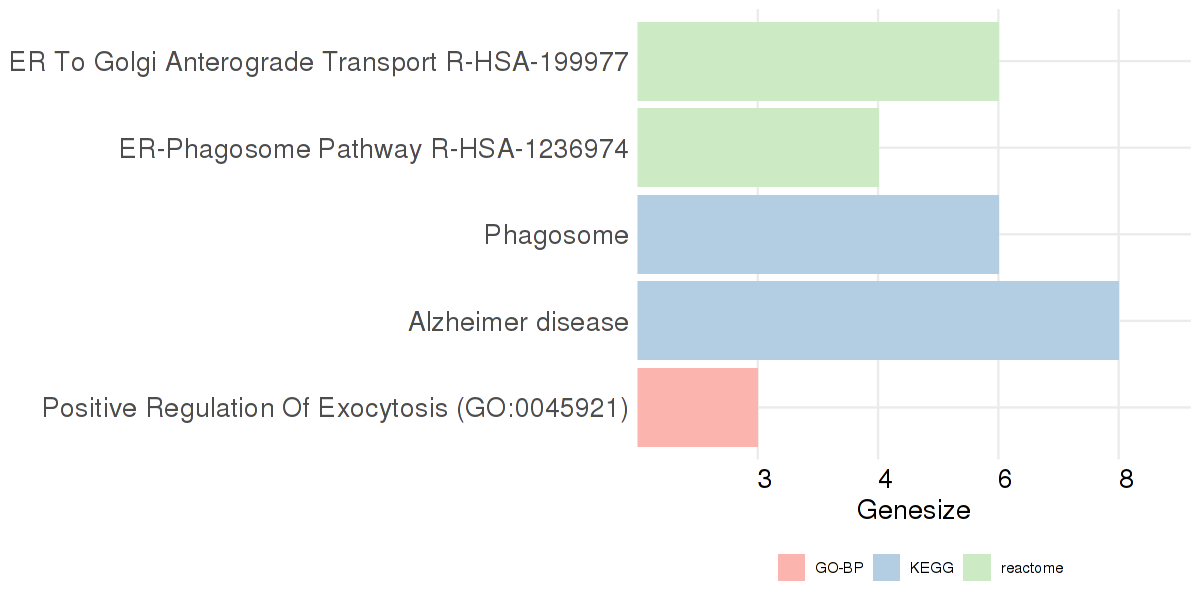

In [35]:
require(forcats)
options(repr.plot.width=10, repr.plot.height=5)
ggplot(enrich_result.p[grep("Alzheimer|Phagosome|ER To Golgi Anterograde|Positive Regulation Of Exocytosis",enrich_result.p$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [32]:
enrich_result.n <- rbind(cbind(enrich_results.n[[1]],"group"="KEGG"),
                         cbind(enrich_results.n[[2]],"group"="reactome"),
                         cbind(enrich_results.n[[3]],"group"="GO-BP"),
                         cbind(enrich_results.n[[4]],"group"="GO-CC")) %>% 
                        mutate("Genesize" = (str_split_i(Overlap, "\\/",1))) %>%
                        dplyr::filter(Genesize > 2 & P.value < 0.01)
                         #cbind(enrich_results[[5]][grep("phagocy|cili|Cili|Phagocy||lysosom|Lysosom|secre|Secre|exocy|Exocy|exosom|Exosom", enrich_results[[5]] %>% dplyr::filter(P.value <0.1)  %>% pull(Term)),],"group"="GO-MF")
enrich_result.n$Term

[1] "Oocyte meiosis"                                                                                     
 [2] "SRP-dependent Cotranslational Protein Targeting To Membrane R-HSA-1799339"                          
 [3] "Translation R-HSA-72766"                                                                            
 [4] "Eukaryotic Translation Termination R-HSA-72764"                                                     
 [5] "Nonsense Mediated Decay (NMD) Enhanced By Exon Junction Complex (EJC) R-HSA-975957"                 
 [6] "Interferon Alpha/Beta Signaling R-HSA-909733"                                                       
 [7] "Metabolism Of Proteins R-HSA-392499"                                                                
 [8] "Peptide Chain Elongation R-HSA-156902"                                                              
 [9] "Selenocysteine Synthesis R-HSA-2408557"                                                             
[10] "Eukaryotic Translation Elongation R-HSA-156842"                                                     
[11] "Viral mRNA Translation R-HSA-192823"                                                                
[12] "Nonsense Mediated Decay (NMD) Independent Of Exon Junction Complex (EJC) R-HSA-975956"              
[13] "SARS-CoV-2 Modulates Host Translation Machinery R-HSA-9754678"                                      
[14] "Response Of EIF2AK4 (GCN2) To Amino Acid Deficiency R-HSA-9633012"                                  
[15] "Formation Of A Pool Of Free 40S Subunits R-HSA-72689"                                               
[16] "Formation Of Ternary Complex, And Subsequently, 43S Complex R-HSA-72695"                            
[17] "Regulation Of Expression Of SLITs And ROBOs R-HSA-9010553"                                          
[18] "L13a-mediated Translational Silencing Of Ceruloplasmin Expression R-HSA-156827"                     
[19] "GTP Hydrolysis And Joining Of 60S Ribosomal Subunit R-HSA-72706"                                    
[20] "Major Pathway Of rRNA Processing In Nucleolus And Cytosol R-HSA-6791226"                            
[21] "Ribosomal Scanning And Start Codon Recognition R-HSA-72702"                                         
[22] "Translation Initiation Complex Formation R-HSA-72649"                                               
[23] "mRNA Activation Upon Binding Of Cap-Binding Complex And eIFs, Subsequent Binding To 43S R-HSA-72662"
[24] "Selenoamino Acid Metabolism R-HSA-2408522"                                                          
[25] "Cap-dependent Translation Initiation R-HSA-72737"                                                   
[26] "Synthesis Of DNA R-HSA-69239"                                                                       
[27] "rRNA Processing In Nucleus And Cytosol R-HSA-8868773"                                               
[28] "Autodegradation Of Cdh1 By Cdh1:APC/C R-HSA-174084"                                                 
[29] "Cell Cycle Checkpoints R-HSA-69620"                                                                 
[30] "Mitochondrial Protein Import R-HSA-1268020"                                                         
[31] "Metabolism Of Amino Acids And Derivatives R-HSA-71291"                                              
[32] "rRNA Processing R-HSA-72312"                                                                        
[33] "APC/C:Cdc20 Mediated Degradation Of Securin R-HSA-174154"                                           
[34] "Macromolecule Biosynthetic Process (GO:0009059)"                                                    
[35] "Gene Expression (GO:0010467)"                                                                       
[36] "Cytoplasmic Translation (GO:0002181)"                                                               
[37] "Antiviral Innate Immune Response (GO:0140374)"                                                      
[38] "Peptide Biosynthetic Process (GO:004

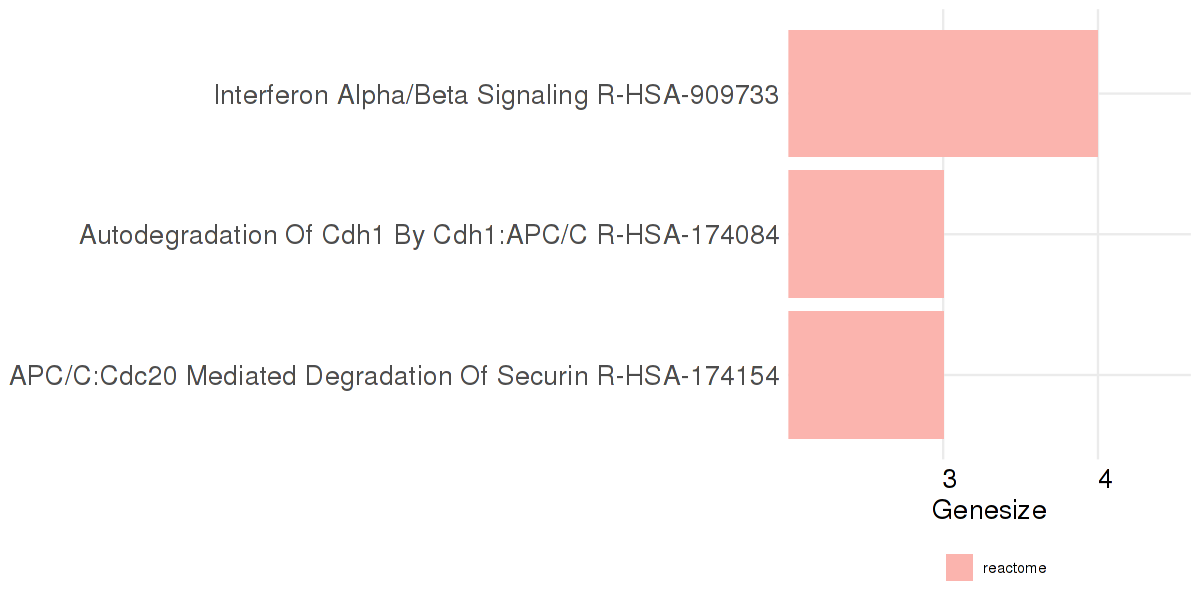

In [38]:
options(repr.plot.width=10, repr.plot.height=5)
require(forcats)

ggplot(enrich_result.n[grep("Interferon|Autodegradation Of Cdh1 By Cdh1:APC/C|APC/C:Cdc20 Mediated Degradation Of Securin ",enrich_result.n$Term),], aes(Genesize, fct_reorder(Term, group),  fill=group)) + 
 geom_col(orientation='y') + 
    #scale_fill_grey(start = 0, end = .9)+
        # xlim(-2.5,2.5)+
    # scale_fill_continuous(low='red', high='blue', guide=guide_colorbar(reverse=TRUE)) + 
scale_fill_brewer(palette = "Pastel1")+
    theme_minimal() + ylab(NULL) +
     theme(legend.position="bottom",
                axis.text.x = element_text(size = 16, hjust = 0, colour = "black"),
                axis.text.y = element_text(size = 16),
                axis.title = element_text(size = 16),
                legend.title = element_blank(),
                legend.background = element_blank())

In [39]:
require(nichenetr)
group1_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Alzheimer",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Calml3","Sdhd","Klc1","Cox7c")
group2_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("Phagosome",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Scoc","Hip1","Tsg101","Ywhab")
group3_genes <- unique(unlist(str_split(enrich_result.p$Genes[grep("ER To Golgi Anterograde|Positive Regulation Of Exocytosis",enrich_result.p$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Stx12","Stx4","Mpeg1","Atp6v0a1")
group4_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Interferon",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()#c("Dync1i2","Dync1li2")
group5_genes <- unique(unlist(str_split(enrich_result.n$Genes[grep("Autodegradation Of Cdh1 By Cdh1:APC/C|APC/C:Cdc20 Mediated Degradation Of Securin",enrich_result.n$Term)],";"))) %>% convert_human_to_mouse_symbols()


Loading required package: nichenetr

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [45]:
enrich_result.p[grep("Alzheimer|Phagosome|ER To Golgi Anterograde|Positive Regulation Of Exocytosis",enrich_result.p$Term),]

-log10(enrich_result.p$Adjusted.P.value[grep("Alzheimer|Phagosome|ER To Golgi Anterograde|Positive Regulation Of Exocytosis",enrich_result.p$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
3,Alzheimer disease,8/175,0.0001185900,0.005072186,0,0,5.887725,53.22408,CASP9;NDUFA9;NDUFA13;NDUFA10;CALML3;SDHD;CYC1;COX7C,KEGG,8
9,Phagosome,6/180,0.0041990915,0.064583148,0,0,4.184334,22.90039,SEC61A2;SEC61A1;SEC61G;RAB5A;ATP6V0C;ACTG1,KEGG,6
36,ER To Golgi Anterograde Transport R-HSA-199977,6/133,0.0009145625,0.019760334,0,0,5.746573,40.20915,ARF4;SEC16A;KDELR2;MIA3;DYNLL1;ACTR10,reactome,6
76,ER-Phagosome Pathway R-HSA-1236974,4/89,0.0067423636,0.059332800,0,0,5.666284,28.32771,SEC61A2;SEC61A1;PSMA2;SEC61G,reactome,4
119,Positive Regulation Of Exocytosis (GO:0045921),3/37,0.0036680922,0.079783246,0,0,10.587166,59.37371,TSG101;CHMP2A;RAB5A,GO-BP,3


[1] 2.294805 1.189881 1.704206 1.226705 1.098088

In [46]:
enrich_result.n[grep("Interferon|Autodegradation Of Cdh1 By Cdh1:APC/C|APC/C:Cdc20 Mediated Degradation Of Securin ",enrich_result.n$Term),]

-log10(enrich_result.n$Adjusted.P.value[grep("Interferon|Autodegradation Of Cdh1 By Cdh1:APC/C|APC/C:Cdc20 Mediated Degradation Of Securin ",enrich_result.n$Term)])

,Term,Overlap,P.value,Adjusted.P.value,Old.P.value,Old.Adjusted.P.value,Odds.Ratio,Combined.Score,Genes,group,Genesize
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>
6,Interferon Alpha/Beta Signaling R-HSA-909733,4/72,0.001109821,0.09204666,0,0,9.549662,64.97167,IFIT1;XAF1;IFIT3;IFIT2,reactome,4
28,Autodegradation Of Cdh1 By Cdh1:APC/C R-HSA-174084,3/63,0.007363422,0.10236921,0,0,8.054472,39.55737,PSMA6;ANAPC4;ANAPC2,reactome,3
33,APC/C:Cdc20 Mediated Degradation Of Securin R-HSA-174154,3/67,0.008722810,0.10510986,0,0,7.549543,35.79853,PSMA6;ANAPC4;ANAPC2,reactome,3


[1] 1.0359920 0.9898306 0.9783565

Loading required package: RColorBrewer

Warning message:
“Removed 453 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 542 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_text_repel()`).”


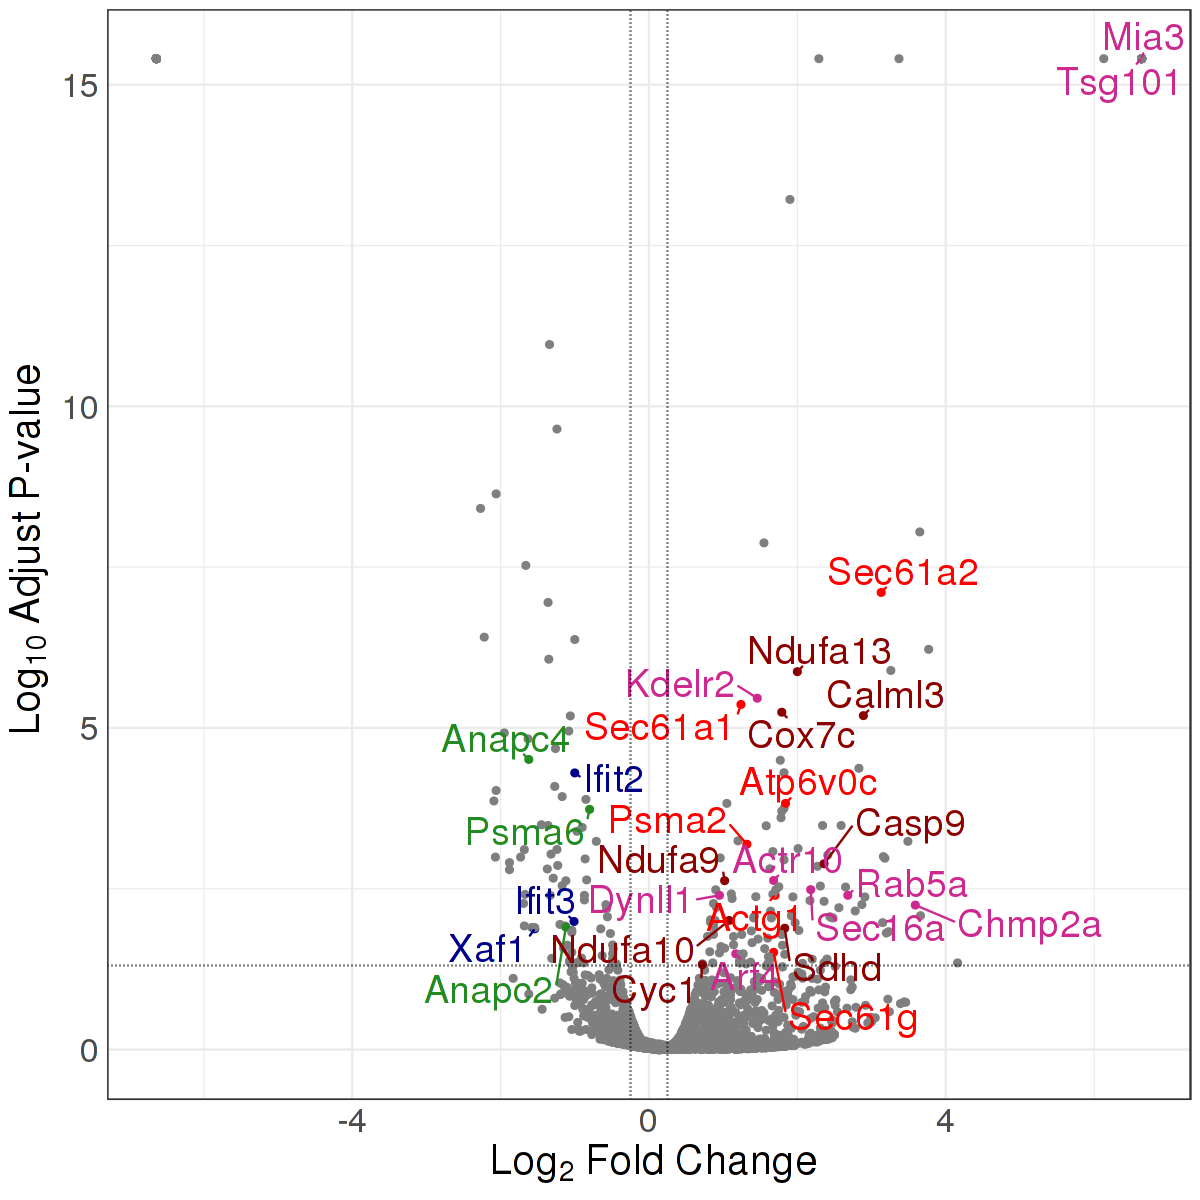

Warning message:
“Removed 453 rows containing missing values (`geom_point()`).”


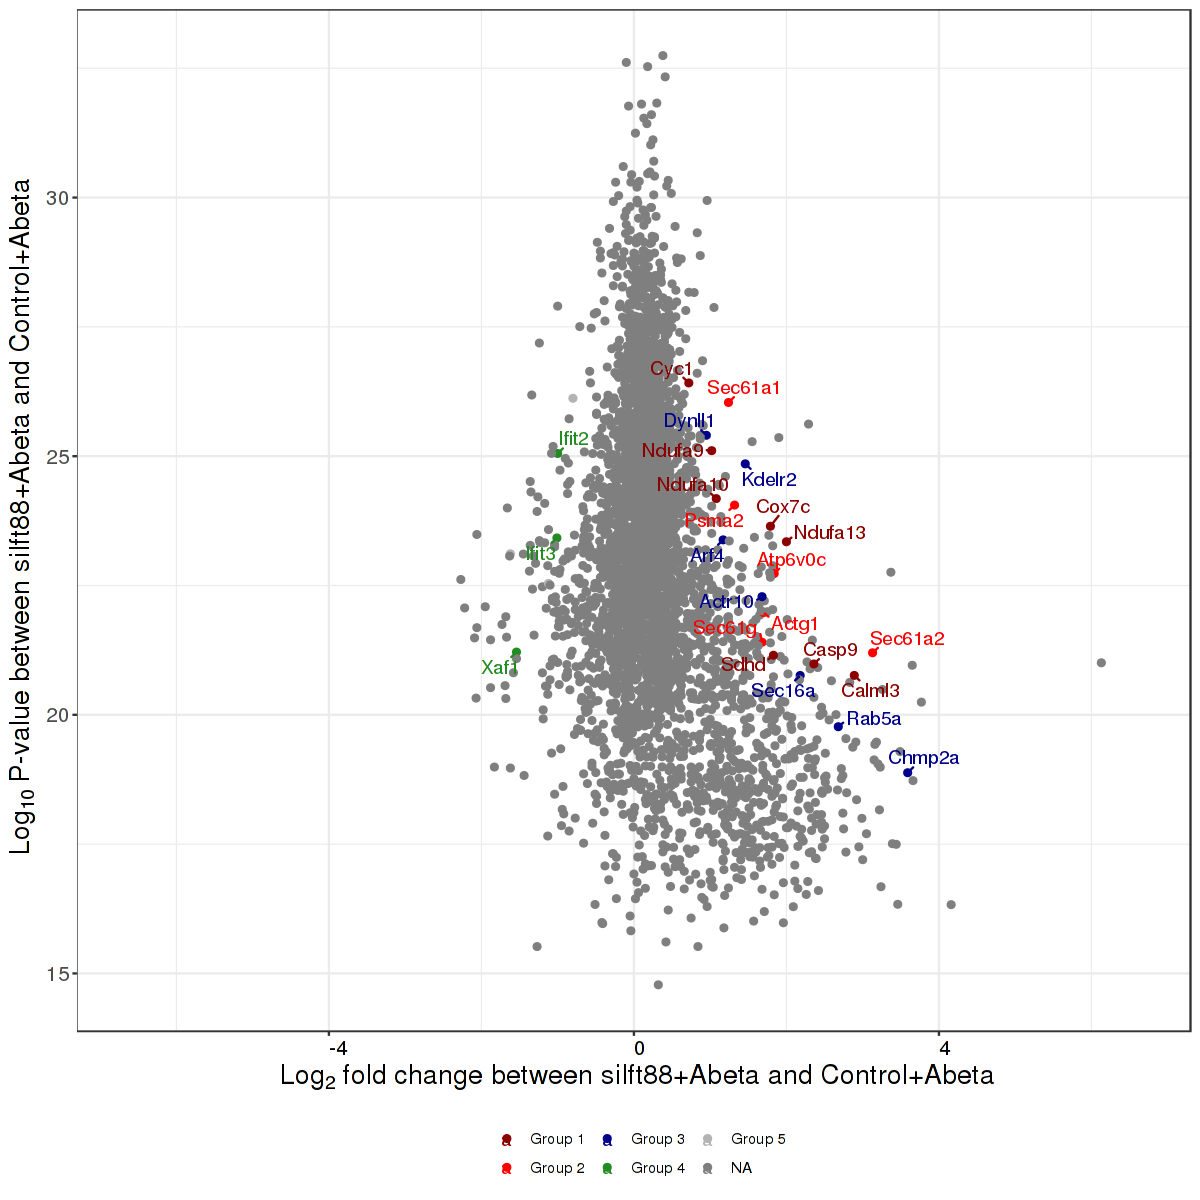

In [40]:

# options(repr.plot.width = 16, repr.plot.height = 16)
keyvals.colour <- c()
keyvals.colour <- ifelse(objDat$Gene.names %in% group1_genes, 'darkred', 'grey50')
keyvals.colour[objDat$Gene.names %in% group2_genes] <- "red"
keyvals.colour[objDat$Gene.names %in% group3_genes] <- "maroon3"
keyvals.colour[objDat$Gene.names %in% group4_genes] <- "blue4"
keyvals.colour[objDat$Gene.names %in% group5_genes] <- "forestgreen"
keyvals.colour[is.na(keyvals.colour)] <- 'grey70'

names(keyvals.colour)[keyvals.colour == 'grey70'] <- 'ns'
names(keyvals.colour)[keyvals.colour == 'darkred'] <- 'Group 1'
names(keyvals.colour)[keyvals.colour == 'red'] <- 'Group 2'
names(keyvals.colour)[keyvals.colour == 'maroon3'] <- 'Group 3'
names(keyvals.colour)[keyvals.colour == 'blue4'] <- 'Group 4'
names(keyvals.colour)[keyvals.colour == 'forestgreen'] <- 'Group 5'



objDat$group <- names(keyvals.colour)
options(repr.plot.width=10, repr.plot.height=10)
require(RColorBrewer)
require(ggrepel)

p1<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=-log10(Abundance.Ratio.P_Value), color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes,group5_genes)  ,],
                  aes(label=Gene.names), 
                  size = 8,
                  fontface = "italic", 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'Fold Change'))+
  ylab(bquote(~Log[10]~ 'Adjust P-value'))+
  scale_colour_manual(values = c("darkred","red","maroon3","blue4","forestgreen","grey70"))+ 
        geom_vline(xintercept=c(-0.25, 0.25), col="black", linetype="dotted") +
        geom_hline(yintercept=-log10(0.05), col="black", linetype="dotted") +
  theme_bw()+
  theme(legend.position = "bottom",  
        axis.title = element_text(size = 24, face = "bold"), 
        plot.title = element_blank(), 
        axis.text = element_text(size = 20),  
        axis.line = element_blank(), 
        axis.ticks = element_blank(),
        # legend.key.size = unit(1, 'in'),
         legend.title = element_blank(),
        legend.text = element_text(size=20))    + 
   theme(legend.position = "none")

print(p1)

p2<-ggplot(objDat, aes(x=Abundance.Ratio.log2, y=Abundance.Ratio.Weight, color =group)) + 
  geom_point() +
  geom_text_repel(data = objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes)  ,],
                  aes(label=Gene.names), 
                  arrow = arrow(length = unit(0.0001, "npc")),
                  #colour = objDat$group,
                  max.overlaps = 100, min.segment.length=0.1)+
  xlab(bquote(~Log[2]~ 'fold change between siIft88+Abeta and Control+Abeta'))+
  ylab(bquote(~Log[10]~ 'P-value between siIft88+Abeta and Control+Abeta'))+
  scale_colour_manual(values = c("darkred","red","blue4","forestgreen","grey70"))+ 
  
  theme_bw()+
  theme(legend.position=c(0.9, 0.2),
        axis.text.x = element_text(size = 12, hjust = 0, colour = "black"),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 16),
        legend.title = element_blank(),
        legend.background = element_blank()) + 
   theme(legend.position = "bottom")

print(p2)


ggsave(paste0(path,"/results/Figure6c_BVsiIft88_Lysate_Volcano plot22.pdf"), p1, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)
#ggsave(paste0(path,"/results/BVsiIft88_Lysate_ScatterPlot plot22.pdf"), p2, width =7.5, height =7.5, units = "in", device = "pdf", dpi = 600)


In [48]:
require(xlsx)
write.xlsx(enrich_result.p, paste0(path,"/results/Figure6d_BVsiIft88_wholecelllysate_pathwayP.xlsx"))
write.xlsx(enrich_result.n, paste0(path,"/results/Figure6d_BVsiIft88_wholecelllysate_pathwayN.xlsx"))

In [ ]:
insAccs <- objDat$Accession[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes)]
objDat[objDat$Gene.names %in% c(group1_genes,group2_genes,group3_genes,group4_genes),]

In [ ]:
colnames(objDat)
#insAccs <- objDat %>% dplyr::filter(abs(Abundance.Ratio.log2) > 0.5 & Abundance.Ratio.P_Value < 0.01) %>% pull(Accession)

In [ ]:
library("STRINGdb")
figure_network<-list()

string_db <- STRINGdb$new( version="11.5", species=10090, score_threshold=00, input_directory="~/R") #mouse : 10090, human : 9606
# map to STRING


example1_mapped = string_db$map( objDat[which(objDat$Accession %in% insAccs),], "Gene.names", removeUnmappedRows = TRUE )

example1_mapped_pval05 = string_db$add_diff_exp_color( subset(example1_mapped, Abundance.Ratio.P_Value<0.01), logFcColStr='Abundance.Ratio.log2')    
payload_id = string_db$post_payload( example1_mapped_pval05$STRING_id, colors=example1_mapped_pval05$color )

hits = example1_mapped_pval05$STRING_id




In [ ]:
#pdf(paste0(path,"/results/BVsiIft88_Lysate_stringDB.pdf"), width=5, height=5, paper="letter")
tiff(paste0(path,"/results/BVsiIft88_Lysate_stringDB.tiff"), width=5, height=5, units="in", pointsize=8, compression="lzw", bg="white", res=1200)
string_db$plot_network(hits)
dev.off()
# get clusters

In [ ]:
clustersList = string_db$get_clusters(example1_mapped_pval05$STRING_id)
length(clustersList)

print(clustersList)

In [ ]:
resList <- lapply(clustersList, function(cls) {

    res <- string_db$add_proteins_description(data.frame(STRING_id = cls))
    
    #clustersList[[1]] %>% length()
#print(res$preferred_name)
#paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|")

    return(grep(paste0(c(group1_genes,group2_genes,group3_genes,group4_genes), collapse = "|"), res$preferred_name, value = TRUE))
  
})





In [ ]:
print(resList)

In [ ]:
string_db$plot_network(clustersList[[1]])
string_db$plot_network(clustersList[[3]])